In [7]:
import pandas_datareader as pdr
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))





Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9817.837, BIC=9842.244, Fit time=9.197 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=10444.334, BIC=10454.097, Fit time=0.158 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=10123.714, BIC=10143.240, Fit time=2.784 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9822.152, BIC=9841.678, Fit time=2.185 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=9819.816, BIC=9849.104, Fit time=37.310 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=10375.786, BIC=10395.312, Fit time=11.269 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=9824.612, BIC=9853.901, Fit time=31.929 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=9819.427, BIC=9853.597, Fit time=20.319 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=9795.735, BIC=9825.024, Fit time=8.213 seconds
Fit ARIMA: order=(

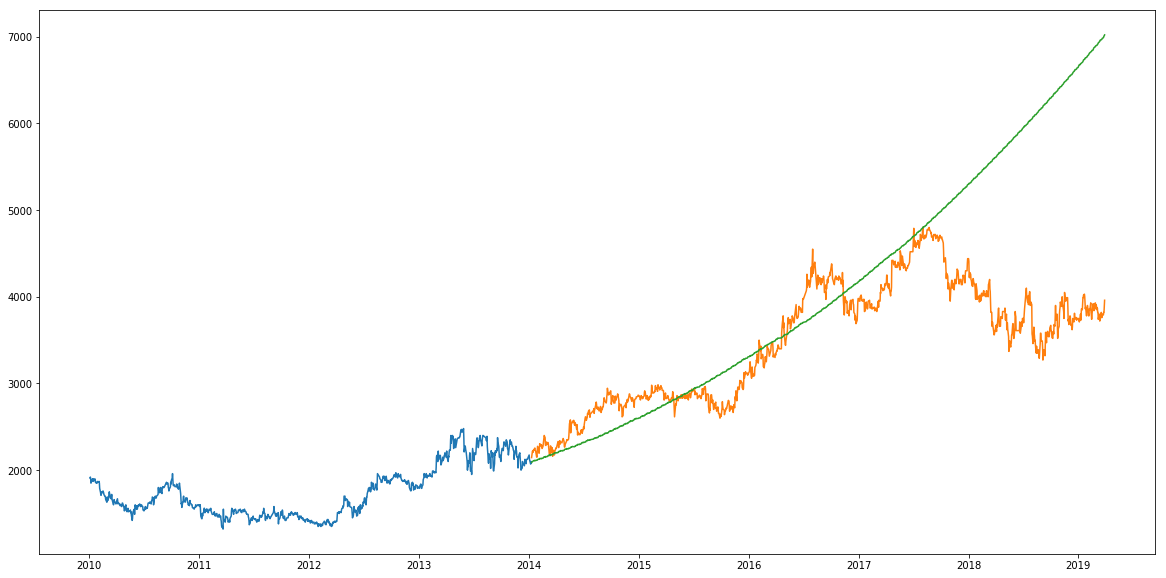

In [9]:
datastocks = pdr.get_data_yahoo(symbols+".JK", start=datetime(startyear, startmonth, startdate), end=datetime(endyear, endmonth, enddate))
datastockss = pd.DataFrame(datastocks)
datastockss.reset_index(level=['Date'],inplace=True)

#setting index as date values
datastockss['Date'] = pd.to_datetime(datastockss.Date,format='%Y-%m-%d')
datastockss.index = datastockss['Date']
datastockss['Date'] = datastockss['Date'].map(dt.datetime.toordinal)

from pmdarima.arima import auto_arima

data = datastockss.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

training

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=1301)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
print(rms)

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])
plt.show()

In [8]:
import pickle
filename = 'autoarima.sav';
pickle.dump(model, open(filename, 'wb'))